In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date
from scipy.stats import mode

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

# Data Quality Check

### Missing Values

In [3]:
print(df.isnull().sum())

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


### Data type

In [4]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

### Descriptive Statistics

In [5]:
print(df.describe())

                          order_date                      ship_date  \
count                          51290                          51290   
mean   2013-05-11 21:26:49.155780864  2013-05-15 20:42:42.745174528   
min              2011-01-01 00:00:00            2011-01-03 00:00:00   
25%              2012-06-19 00:00:00            2012-06-23 00:00:00   
50%              2013-07-08 00:00:00            2013-07-12 00:00:00   
75%              2014-05-22 00:00:00            2014-05-26 00:00:00   
max              2014-12-31 00:00:00            2015-01-07 00:00:00   
std                              NaN                            NaN   

              sales      quantity      discount        profit  shipping_cost  \
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000   
mean     246.490581      3.476545      0.142908     28.641740      26.375818   
min        0.444000      1.000000      0.000000  -6599.978000       0.002000   
25%       30.758625      2.000000      0

### Duplicate Check

In [6]:
duplicate_rows = df.duplicated()

print("Duplicate Rows(True):", duplicate_rows.sum())
print("Duplicate Rows(False):", (len(duplicate_rows) - duplicate_rows.sum()))

Duplicate Rows(True): 0
Duplicate Rows(False): 51290


# Exploratory Data Analysis (EDA)

### 1. Annual Sales and Profit Trend
Observing the sales and profit trend from year to year.

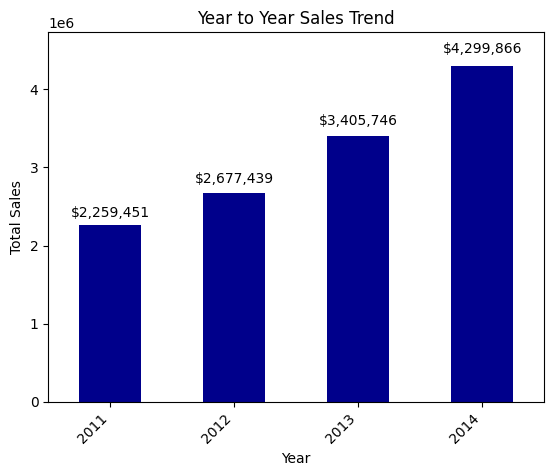

In [7]:
yearly_sales = df.groupby('year')['sales'].sum()
ax = yearly_sales.plot(kind='bar',color='darkblue', xlabel='Year', ylabel='Total Sales', title='Year to Year Sales Trend')

for i, v in enumerate(yearly_sales):
    ax.text(i, v + 0.03 * v, '${:,.0f}'.format(v), ha='center', va='bottom')
ax.set_ylim(0, max(yearly_sales) * 1.1)
ax.set_xticklabels(yearly_sales.index, rotation=45, ha='right')
plt.show()

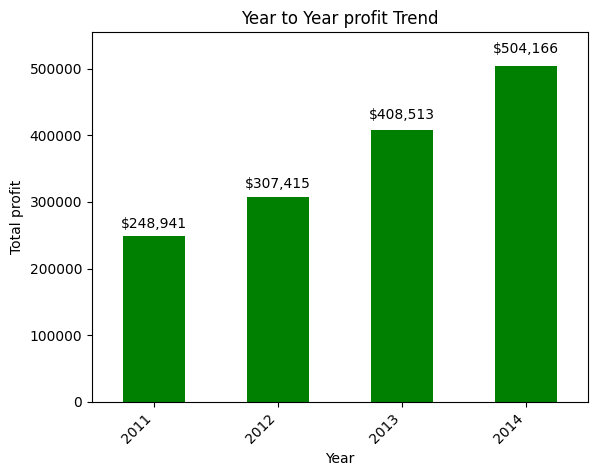

In [8]:
yearly_profit = df.groupby('year')['profit'].sum()
ax = yearly_profit.plot(kind='bar',color='green', xlabel='Year', ylabel='Total profit', title='Year to Year profit Trend')

for i, v in enumerate(yearly_profit):
    ax.text(i, v + 0.03 * v, '${:,.0f}'.format(v), ha='center', va='bottom')
ax.set_ylim(0, max(yearly_profit) * 1.1)
ax.set_xticklabels(yearly_profit.index, rotation=45, ha='right')
plt.show()

### 2. Sales by Product Category
Identifying the most popular product category. and breakdown top 5 `product_name` from that category

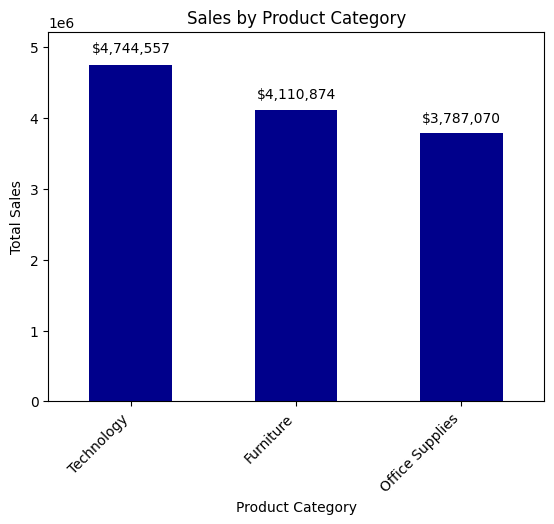

In [9]:
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
ax = category_sales.plot(kind='bar',color='darkblue', xlabel='Product Category', ylabel='Total Sales', title='Sales by Product Category')

for i, v in enumerate(category_sales):
    ax.text(i, v + 0.03 * v, '${:,.0f}'.format(v), ha='center', va='bottom')

ax.set_ylim(0, max(category_sales) * 1.1)
ax.set_xticklabels(category_sales.index, rotation=45, ha='right')
plt.show()


In [10]:
#def function for shorter 'product_name' value names
def shorten_name(name, max_length=30):
    if len(name) > max_length:
        return name[:max_length] + '...'
    else:
        return name

# data filter for each category
technology_data = df[df['category'] == 'Technology']
furniture_data = df[df['category'] == 'Furniture']
office_supplies_data = df[df['category'] == 'Office Supplies']

# Function to get top 5 product_name
def get_top_products(data):
    top_products = data.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(5)
    top_products.index = top_products.index.map(shorten_name)
    return top_products

# Top 5 Product for each category
top_tech_products = get_top_products(technology_data)
top_furniture_products = get_top_products(furniture_data)
top_office_supplies_products = get_top_products(office_supplies_data)


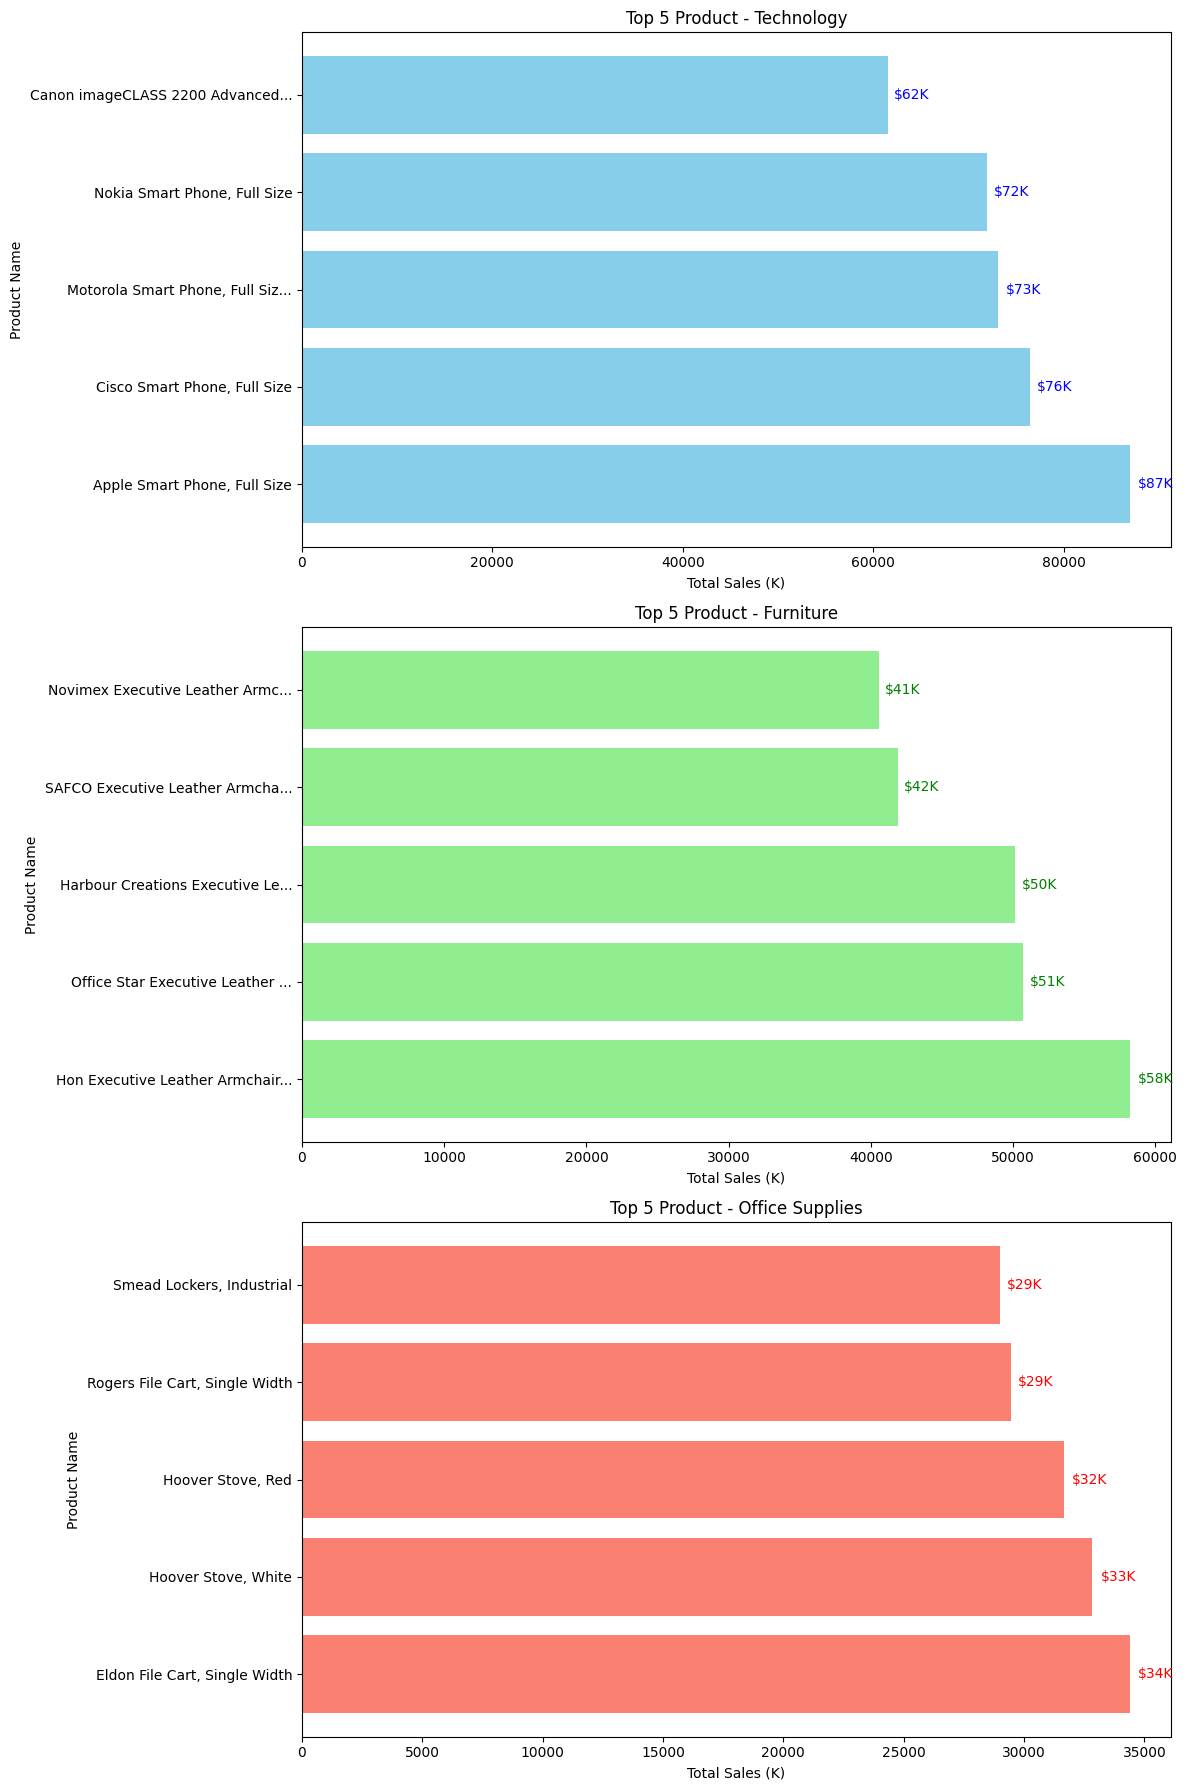

In [11]:
# Plot bar chart for each category
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Technology
axs[0].barh(top_tech_products.index, top_tech_products.values, color='skyblue')
axs[0].set_title('Top 5 Product - Technology')
axs[0].set_xlabel('Total Sales (K)')
axs[0].set_ylabel('Product Name')
for i, v in enumerate(top_tech_products.values):
    axs[0].text(v + 0.01 * v, i, '${:,.0f}K'.format(v / 1000), color='blue', va='center')

# Furniture
axs[1].barh(top_furniture_products.index, top_furniture_products.values, color='lightgreen')
axs[1].set_title('Top 5 Product - Furniture')
axs[1].set_xlabel('Total Sales (K)')
axs[1].set_ylabel('Product Name')
for i, v in enumerate(top_furniture_products.values):
    axs[1].text(v + 0.01 * v, i, '${:,.0f}K'.format(v / 1000), color='green', va='center')

# Office Supplies
axs[2].barh(top_office_supplies_products.index, top_office_supplies_products.values, color='salmon')
axs[2].set_title('Top 5 Product - Office Supplies')
axs[2].set_xlabel('Total Sales (K)')
axs[2].set_ylabel('Product Name')
for i, v in enumerate(top_office_supplies_products.values):
    axs[2].text(v + 0.01 * v, i, '${:,.0f}K'.format(v / 1000), color='red', va='center')

# add padding on left corner
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)

plt.tight_layout()
plt.show()

### 3. Distribution of Shipping Modes
Observing how shipping modes are distributed.

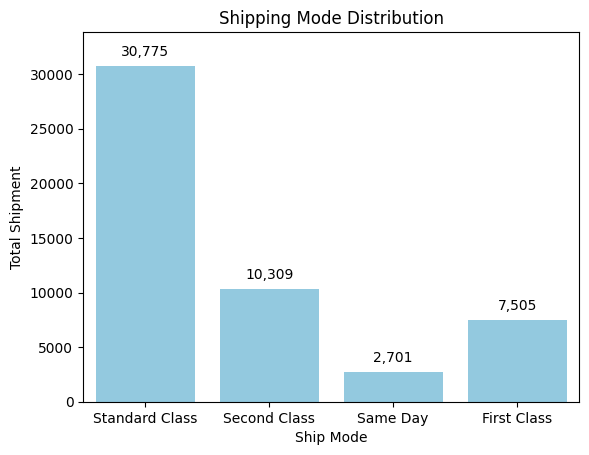

In [12]:
sns.countplot(x='ship_mode', data=df, color='skyblue')
plt.title('Shipping Mode Distribution')

for p in plt.gca().patches:
    plt.gca().annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.ylim(0, max(df['ship_mode'].value_counts()) * 1.1)
plt.xlabel('Ship Mode')
plt.ylabel('Total Shipment')
plt.show()

### 4. Income by Country/Region
Identifying which country or region provides the highest income.

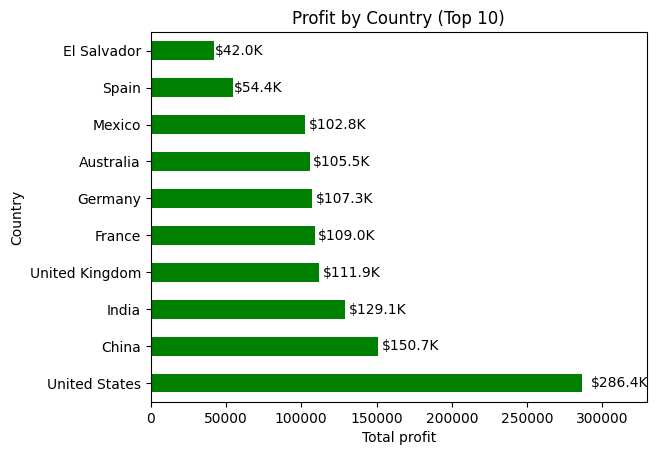

In [13]:
def format_thousands(x):
    return '${:.1f}K'.format(x / 1000)

top_10_countries_profit = df.groupby('country')['profit'].sum().sort_values(ascending=False).head(10)

ax = top_10_countries_profit.plot(kind='barh',color='green', xlabel='Total profit', ylabel='Country', title='Profit by Country (Top 10)')

for i, v in enumerate(top_10_countries_profit):
    ax.text(v + 0.02 * v, i, format_thousands(v), ha='left', va='center')

ax.set_xlim(0, max(top_10_countries_profit) * 1.15)

plt.show()

### 5. Customer Purchase Frequency
Understanding how often customers make purchases.

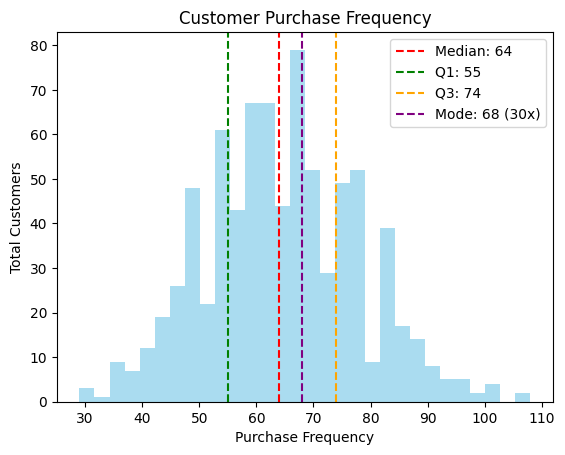

In [14]:
customer_frequency = df['customer_name'].value_counts()

plt.hist(customer_frequency, bins=30, color='skyblue', alpha=0.7)

# Median, Q1, Q3
median = np.percentile(customer_frequency, 50)
q1 = np.percentile(customer_frequency, 25)
q3 = np.percentile(customer_frequency, 75)

# mode_value is the value that shows up ex:'68'| mode_count is how often that value shows up ex: total count '68' appear is 30 times
mode_value = mode(customer_frequency)[0]
mode_count = mode(customer_frequency)[1]

# add line for median, Q1, Q3
plt.axvline(x=median, color='red', linestyle='--', linewidth=1.5, label='Median: {:.0f}'.format(median))
plt.axvline(x=q1, color='green', linestyle='--', linewidth=1.5, label='Q1: {:.0f}'.format(q1))
plt.axvline(x=q3, color='orange', linestyle='--', linewidth=1.5, label='Q3: {:.0f}'.format(q3))

# add line for mode
if mode_value >= plt.gca().get_xlim()[0] and mode_value <= plt.gca().get_xlim()[1]:
    plt.axvline(x=mode_value, color='purple', linestyle='--', linewidth=1.5, label='Mode: {:.0f} ({}x)'.format(mode_value, mode_count))
else:
    plt.text(mode_value, plt.gca().get_ylim()[1] * 0.6, 'Mode: {:.0f} ({} x)'.format(mode_value, mode_count), color='purple', ha='center', va='center')

plt.legend()

plt.xlabel('Purchase Frequency')
plt.ylabel('Total Customers')
plt.title('Customer Purchase Frequency')

plt.show()

### 6. Order Priority Distribution
Observing how order priorities are distributed.

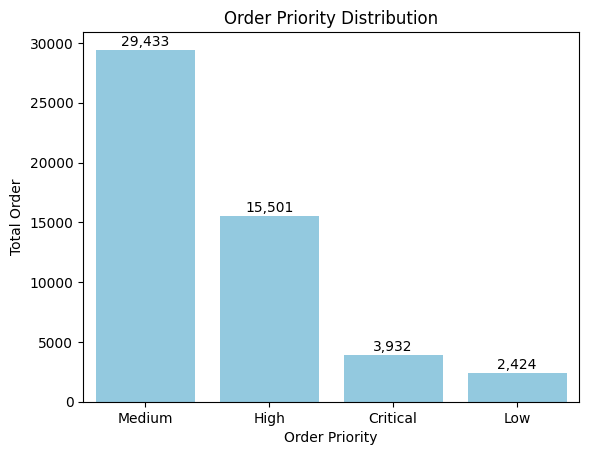

In [15]:
# Create Countplot
sns.countplot(x='order_priority', data=df, color='skyblue')

# Adding Numeric Value above bar
for p in plt.gca().patches:
    plt.gca().annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', xytext=(0, 1), textcoords='offset points')

plt.title('Order Priority Distribution')
plt.xlabel('Order Priority')
plt.ylabel('Total Order')

plt.show()

### 7. Correlation between Discount and Profit
Determining if there's a correlation between the amount of discount given and the profit earned.

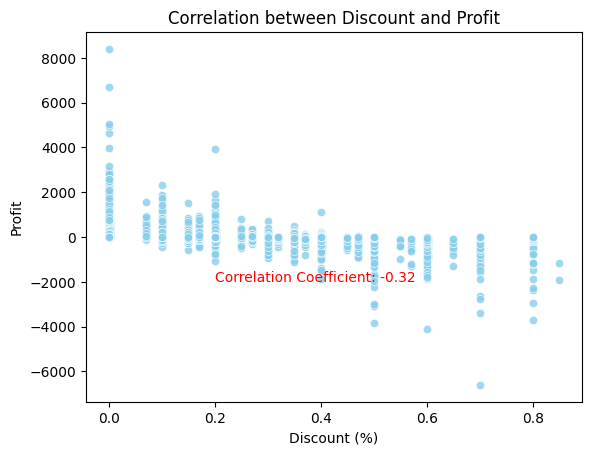

In [16]:
# Scatter plot between Discount and profit
sns.scatterplot(x='discount', y='profit', data=df, color='skyblue', alpha=0.8)

# Variable that count correlation coefficient between discount and profit
correlation_coefficient = df['discount'].corr(df['profit'])

# adding that correlation coefficient to the plot
plt.text(0.2, -2000, 'Correlation Coefficient: {:.2f}'.format(correlation_coefficient), fontsize=10, color='red')

plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.title('Correlation between Discount and Profit')

plt.show()

### 8. Monthly Profit(Discount Apply)
Viewing profit per month for each year.

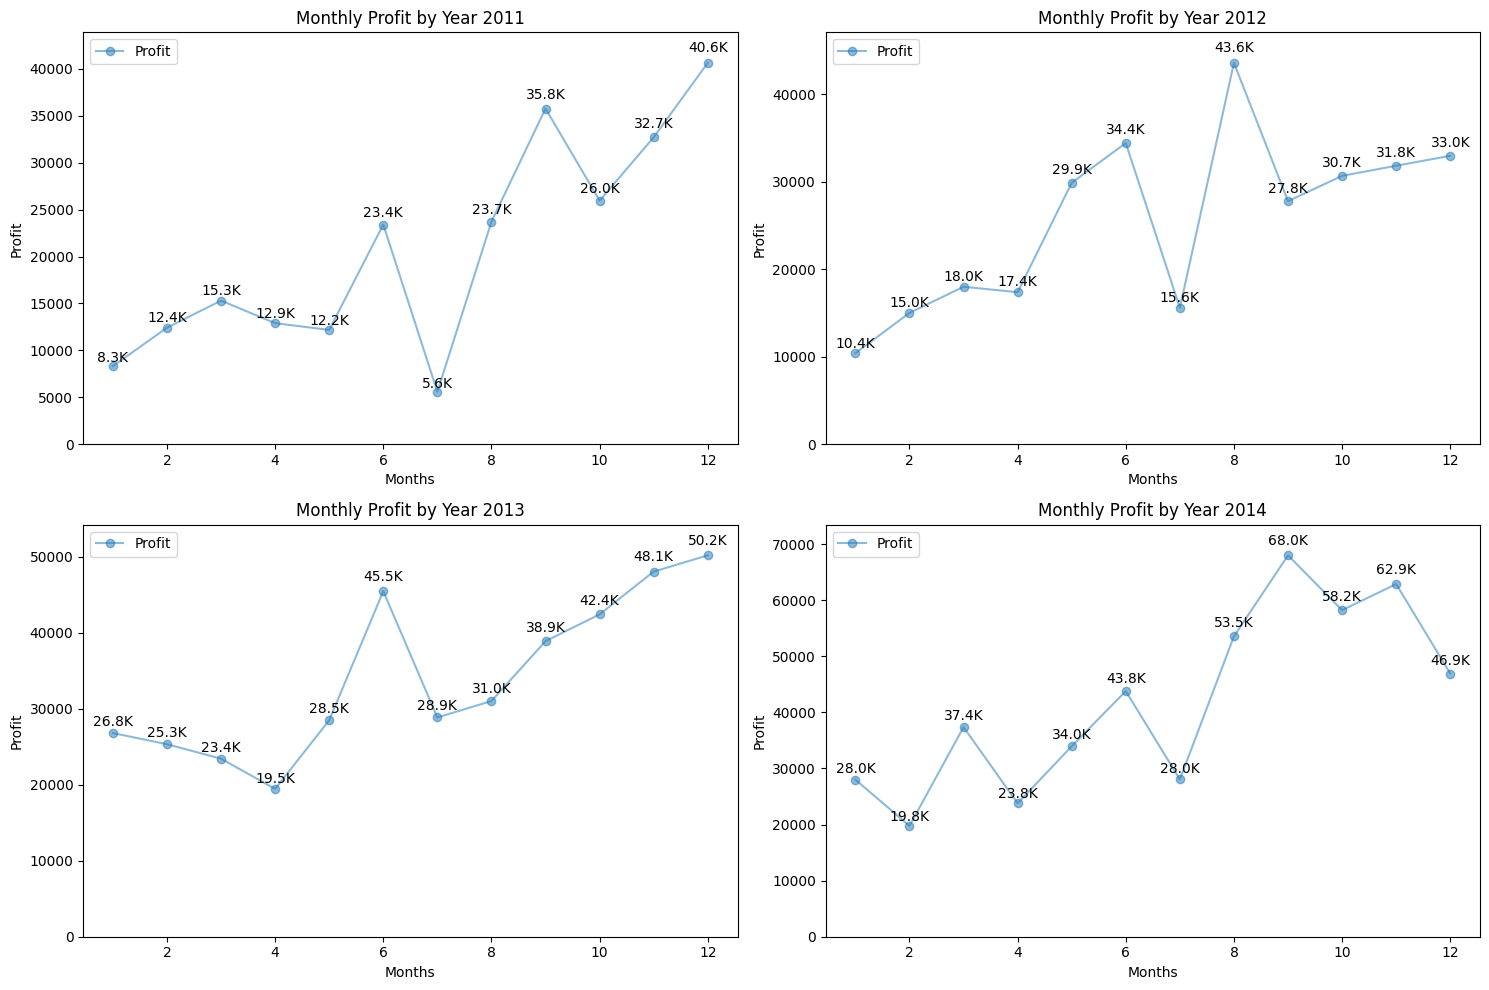

In [17]:
def format_thousands(x):
    return '{:.1f}K'.format(x / 1000)

df['order_date'] = pd.to_datetime(df['order_date'])

df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

monthly_profit = df.groupby(['year', 'month'])['profit'].sum()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loop through each subplot axis and corresponding year from 2011 to 2014
for ax, year in zip(axes.flatten(), range(2011, 2015)):
    data = monthly_profit.loc[year]
    ax.plot(data.index, data.values, marker='o', linestyle='-', alpha=0.5)
    ax.set_title('Monthly Profit by Year {}'.format(year))
    ax.set_xlabel('Months')
    ax.set_ylabel('Profit')
    
    for i, v in zip(data.index, data.values):
        ax.text(i, v * 1.02, format_thousands(v), ha='center', va='bottom')

    ax.set_ylim(0, max(data.values) * 1.08)

# adding legends
axes[0, 0].legend(['Profit'], loc='upper left')
axes[0, 1].legend(['Profit'], loc='upper left')
axes[1, 0].legend(['Profit'], loc='upper left')
axes[1, 1].legend(['Profit'], loc='upper left')

plt.tight_layout()
plt.show()

### 9. Average Profit(Discount Apply) per Order
Calculating the average profit obtained from each order without outliers.

In [18]:
# Calculating Descriptive Statistics profit per Order
order_income_stats = df.groupby('order_id')['profit'].sum().describe()

# Calculating IQR
Q1 = order_income_stats['25%']
Q3 = order_income_stats['75%']
IQR = Q3 - Q1

# Defining the upper and lower bounds without outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
avg_profit_order_no_outliers = df.groupby('order_id')['profit'].sum().loc[(df.groupby('order_id')['profit'].sum() >= lower_bound) & (df.groupby('order_id')['profit'].sum() <= upper_bound)]
avg_profit_order_no_outliers.describe()

count    20500.000000
mean        32.443220
std         62.547835
min       -133.548000
25%          1.500000
50%         17.252400
75%         59.400000
max        222.740000
Name: profit, dtype: float64

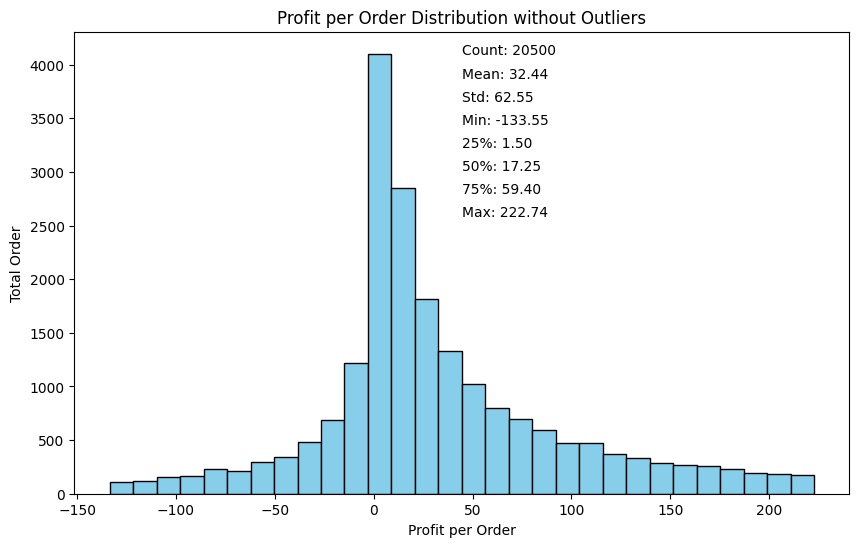

In [19]:

plt.figure(figsize=(10, 6))
avg_profit_order_no_outliers.hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Profit per Order')
plt.ylabel('Total Order')
plt.title('Profit per Order Distribution without Outliers')

plt.text(0.5, 0.95, f"Count: {avg_profit_order_no_outliers.count()}", transform=plt.gca().transAxes)
plt.text(0.5, 0.9, f"Mean: {avg_profit_order_no_outliers.mean():.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"Std: {avg_profit_order_no_outliers.std():.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.8, f"Min: {avg_profit_order_no_outliers.min():.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.75, f"25%: {avg_profit_order_no_outliers.quantile(0.25):.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.7, f"50%: {avg_profit_order_no_outliers.quantile(0.50):.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.65, f"75%: {avg_profit_order_no_outliers.quantile(0.75):.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.6, f"Max: {avg_profit_order_no_outliers.max():.2f}", transform=plt.gca().transAxes)

plt.grid(False)
plt.show()

### 10. RFM Analysis
Determining customer segmentation based on Recency, Frequency, and Monetary.

In [20]:
latest_date = df['order_date'].max()

# Calculating Recency, Frequency, and Monetary values
rfm_table = df.groupby('customer_name').agg({
    'order_date': lambda x: (latest_date - x.max()).days,
    'order_id': 'count',
    'profit': 'sum'
})

# Renaming columns to Recency, Frequency, and Monetary
rfm_table.rename(columns={
    'order_date': 'Recency',
    'order_id': 'Frequency',
    'profit': 'Monetary'
}, inplace=True)

# Normalization of RFM values
rfm_table['Recency'] = (rfm_table['Recency'] - rfm_table['Recency'].min()) / (rfm_table['Recency'].max() - rfm_table['Recency'].min())
rfm_table['Frequency'] = (rfm_table['Frequency'] - rfm_table['Frequency'].min()) / (rfm_table['Frequency'].max() - rfm_table['Frequency'].min())
rfm_table['Monetary'] = (rfm_table['Monetary'] - rfm_table['Monetary'].min()) / (rfm_table['Monetary'].max() - rfm_table['Monetary'].min())

# Assigning RFM scores
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 4, ['1', '2', '3', '4'])
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'], 4, ['4', '3', '2', '1'])
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 4, ['4', '3', '2', '1'])

# Combining scores into one column
rfm_table['RFM_Score'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)
rfm_table.sample(5)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
customer_name,,,,,,,
Tamara Manning,0.149533,0.329114,0.545024,4,4,2,442
Susan Gilcrest,0.037383,0.367089,0.451475,2,3,4,234
Andy Reiter,0.014019,0.075949,0.626710,1,4,1,141
Brian Moss,0.077103,0.620253,0.710812,3,1,1,311
Joseph Airdo,0.000000,0.594937,0.471780,1,1,4,114


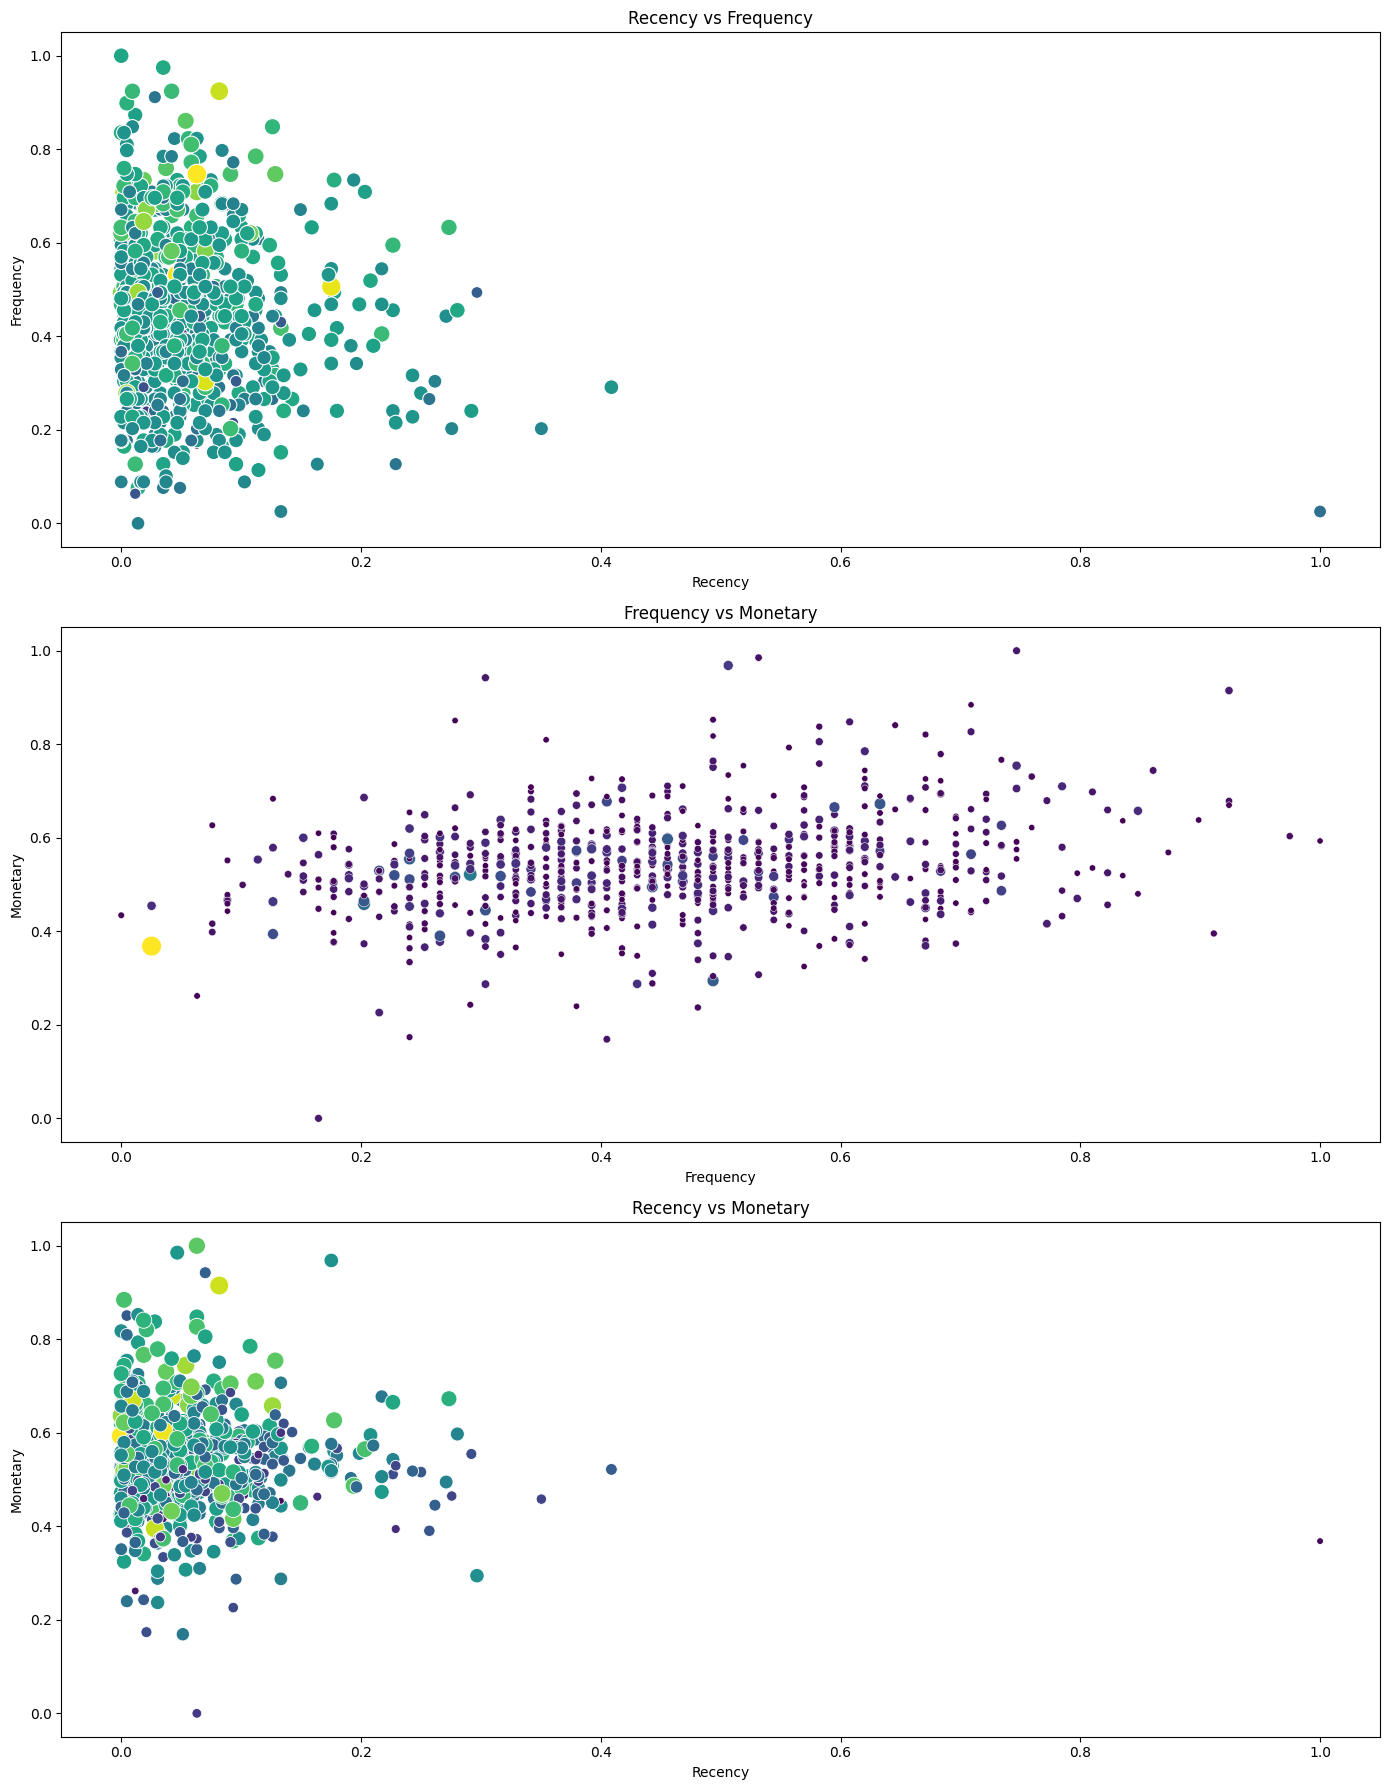

In [21]:
plt.figure(figsize=(14, 18))

# Scatter plot for Recency and Frequency
plt.subplot(3, 1, 1)
sns.scatterplot(x='Recency', y='Frequency', size='Monetary', sizes=(20, 200), hue='Monetary', data=rfm_table, palette='viridis', legend=False)
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Scatter plot for Frequency and Monetary
plt.subplot(3, 1, 2)
sns.scatterplot(x='Frequency', y='Monetary', size='Recency', sizes=(20, 200), hue='Recency', data=rfm_table, palette='viridis', legend=False)
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

# Scatter plot for Recency and Monetary
plt.subplot(3, 1, 3)
sns.scatterplot(x='Recency', y='Monetary', size='Frequency', sizes=(20, 200), hue='Frequency', data=rfm_table, palette='viridis', legend=False)
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()